# MLB Salary Prediction

This project aims to predict Major League Baseball (MLB) players' salaries based on their performance statistics. We use the "Hitters" dataset from the ISLR package, which contains MLB players' salaries and various performance metrics such as At Bats, Hits, Home Runs, Runs, etc.

This part of the code is responsible for loading the necessary packages (libraries) to perform the subsequent data analysis and modeling tasks.

1. `ISLR`: This package contains data sets used in the "Introduction to Statistical Learning with Applications in R" book. In this code, the Hitters dataset from the ISLR package is used for analysis and modeling tasks.

2. `caret`: The "Classification And REgression Training" package provides a set of functions for creating predictive models, as well as tools for data splitting, pre-processing, feature selection, and model tuning. It is used in this code for data partitioning, model evaluation, and calculating RMSE (Root Mean Squared Error).

3. `mgcv`: The "Mixed GAM Computation Vehicle" package provides functions for fitting Generalized Additive Models (GAMs), which are used in this code to create a more flexible model for the data.

4. `glmnet`: This package provides functions for fitting generalized linear models with regularization methods, such as Ridge regression and Lasso regression. In this code, it is used to fit a Ridge regression model.

5. `leaps`: The "leaps" package provides functions for selecting the best subsets of variables for linear regression models, based on different criteria like adjusted R-squared, Cp, AIC, and BIC. In this code, it is used for variable selection with the regsubsets function.

In [26]:
#install.packages('ISLR')
library(ISLR)
#install.packages('caret')
library(caret)
#install.packages('mgcv')
library(mgcv)
#install.packages('glmnet')
library(glmnet)
#install.packages('leaps')
library(leaps)

package 'leaps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\wandrzejew001\AppData\Local\Temp\RtmpWSQLef\downloaded_packages


Warning message:
"package 'leaps' was built under R version 3.6.3"

1. `data(Hitters)`: This line loads the `Hitters` dataset from the `ISLR` package into the R environment. The `Hitters` dataset contains information about baseball players, including their performance statistics and salary.

2. `show(Hitters)`: This line displays the `Hitters` dataset in the console. It is helpful for getting an initial look at the dataset structure and its variables.

3. `summary(Hitters)`: This line generates a summary of the `Hitters` dataset, providing descriptive statistics for each variable, such as the minimum, maximum, mean, and quartiles for numeric variables, or counts and frequencies for factor variables. This is useful for understanding the distribution of the data and identifying potential issues like outliers or missing values.

4. `set.seed(79511)`: This line sets the random seed to a specific value (79511). It ensures that any random operation performed later in the code will produce the same results every time the code is run. This is important for reproducibility, especially when working with functions that involve random sampling or splitting the data into training and testing sets.

5. `salary <- Hitters$Salary`: This line creates a new variable called `salary`, which is assigned the `Salary` column from the Hitters dataset. The `$` operator is used to extract a specific column from a data frame in R.

In [13]:
data(Hitters)
show(Hitters)
summary(Hitters)
set.seed(79511)
salary <- Hitters$Salary

                   AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun
-Andy Allanson       293   66     1   30  29    14     1    293    66      1
-Alan Ashby          315   81     7   24  38    39    14   3449   835     69
-Alvin Davis         479  130    18   66  72    76     3   1624   457     63
-Andre Dawson        496  141    20   65  78    37    11   5628  1575    225
-Andres Galarraga    321   87    10   39  42    30     2    396   101     12
-Alfredo Griffin     594  169     4   74  51    35    11   4408  1133     19
-Al Newman           185   37     1   23   8    21     2    214    42      1
-Argenis Salazar     298   73     0   24  24     7     3    509   108      0
-Andres Thomas       323   81     6   26  32     8     2    341    86      6
-Andre Thornton      401   92    17   49  66    65    13   5206  1332    253
-Alan Trammell       574  159    21  107  75    59    10   4631  1300     90
-Alex Trevino        202   53     4   31  26    27     9   1876   467     15

     AtBat            Hits         HmRun            Runs       
 Min.   : 16.0   Min.   :  1   Min.   : 0.00   Min.   :  0.00  
 1st Qu.:255.2   1st Qu.: 64   1st Qu.: 4.00   1st Qu.: 30.25  
 Median :379.5   Median : 96   Median : 8.00   Median : 48.00  
 Mean   :380.9   Mean   :101   Mean   :10.77   Mean   : 50.91  
 3rd Qu.:512.0   3rd Qu.:137   3rd Qu.:16.00   3rd Qu.: 69.00  
 Max.   :687.0   Max.   :238   Max.   :40.00   Max.   :130.00  
                                                               
      RBI             Walks            Years            CAtBat       
 Min.   :  0.00   Min.   :  0.00   Min.   : 1.000   Min.   :   19.0  
 1st Qu.: 28.00   1st Qu.: 22.00   1st Qu.: 4.000   1st Qu.:  816.8  
 Median : 44.00   Median : 35.00   Median : 6.000   Median : 1928.0  
 Mean   : 48.03   Mean   : 38.74   Mean   : 7.444   Mean   : 2648.7  
 3rd Qu.: 64.75   3rd Qu.: 53.00   3rd Qu.:11.000   3rd Qu.: 3924.2  
 Max.   :121.00   Max.   :105.00   Max.   :24.000   Max.   :14053.0 


	Shapiro-Wilk normality test

data:  salary
W = 0.85111, p-value = 3.307e-15


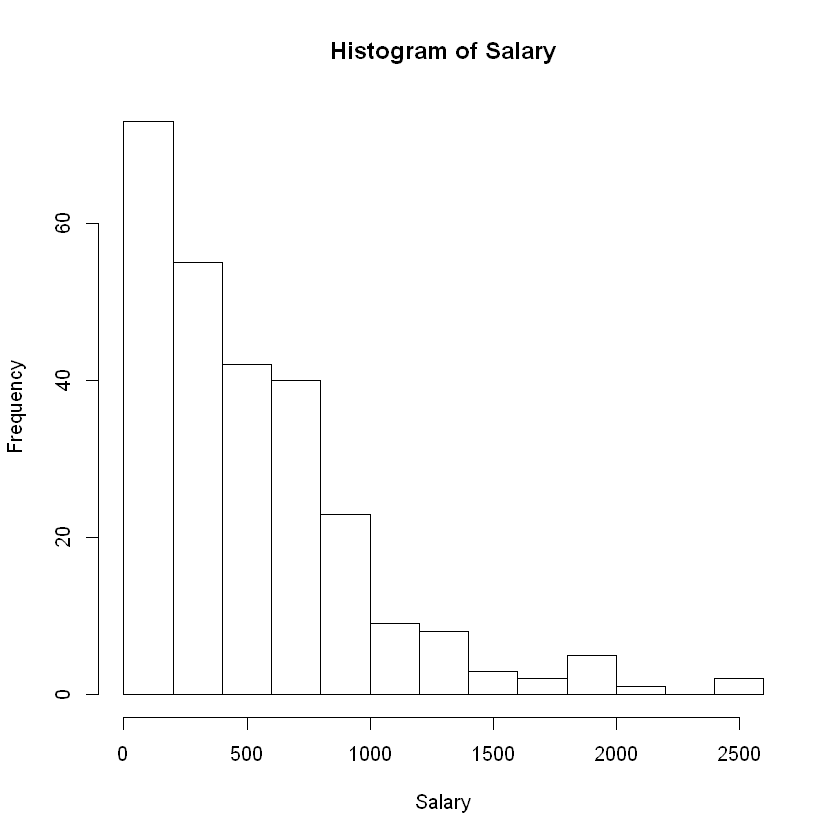

In [14]:
hist(salary,xlab = "Salary", main = "Histogram of Salary")

shapiro.test(salary)


The result of the Shapiro-Wilk test (W = 0.85111, p-value = 3.307e-15) suggests that the data comes from a source that is not consistent with a normal distribution. The p-value is equal to 3.307e-15, which means that it is a very small value and is less than 0.05. This suggests that the null hypothesis of data normality is rejected in favor of the alternative hypothesis of inconsistency with a normal distribution.

In [15]:
#This line of code is used to handle missing values in the Hitters dataset. The function applied replaces any NA (missing) values in a column with the mean of that column. 

Hitters[sapply(Hitters, is.numeric)] <- lapply(Hitters[sapply(Hitters, is.numeric)],
                                               function(x) {
                                                 x[is.na(x)] <- mean(x, na.rm = TRUE)
                                                 x})
show(Hitters)

                   AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun
-Andy Allanson       293   66     1   30  29    14     1    293    66      1
-Alan Ashby          315   81     7   24  38    39    14   3449   835     69
-Alvin Davis         479  130    18   66  72    76     3   1624   457     63
-Andre Dawson        496  141    20   65  78    37    11   5628  1575    225
-Andres Galarraga    321   87    10   39  42    30     2    396   101     12
-Alfredo Griffin     594  169     4   74  51    35    11   4408  1133     19
-Al Newman           185   37     1   23   8    21     2    214    42      1
-Argenis Salazar     298   73     0   24  24     7     3    509   108      0
-Andres Thomas       323   81     6   26  32     8     2    341    86      6
-Andre Thornton      401   92    17   49  66    65    13   5206  1332    253
-Alan Trammell       574  159    21  107  75    59    10   4631  1300     90
-Alex Trevino        202   53     4   31  26    27     9   1876   467     15

In [16]:
#This block of code is used to split the Hitters dataset into three different datasets: training, validation, and test. 

set.seed(79511)

x <- Hitters[, c("AtBat", "Hits", "HmRun", "Runs", "RBI", "Walks", "Years", "CAtBat", "CHits", "CHmRun", "CRuns", "CRBI", "CWalks", "PutOuts", "Assists", "Errors")]
y <- Hitters$Salary
x <- scale(x)

train_test <- sample(1:2, nrow(x), TRUE, prob = 2:1)
train <- as.data.frame(cbind(Salary = y[train_test == 1], x[train_test == 1,]))
valid <- as.data.frame(cbind(Salary = y[train_test == 2], x[train_test == 2,]))

index <- createDataPartition(Hitters$Salary, p = 0.6, list = FALSE)
temp <- Hitters[-index, ]
index <- createDataPartition(temp$Salary, p = 0.5, list = FALSE)
test <- temp[-index, ]



In [17]:
#This block of code is used to find highly correlated variables in the Hitters dataset. 
Hitters_num <- Hitters[, sapply(Hitters, is.numeric)]

Hitters_factors <- Hitters[, !sapply(Hitters, is.numeric)]
Hitters_binary <- model.matrix(~.-1, Hitters_factors)

Hitters_combined <- cbind(Hitters_num, Hitters_binary)

cor_matrix <- cor(Hitters_combined, use = "pairwise.complete.obs")
highly_correlated <- which(abs(cor_matrix) >= 0.5 & cor_matrix < 1, arr.ind = TRUE, useNames = TRUE)

colnames(Hitters_combined)[unique(highly_correlated[, 2])]



[1] "AtBat"      "Hits"       "HmRun"      "Runs"       "RBI"       
 [6] "Walks"      "Years"      "CAtBat"     "CHits"      "CHmRun"    
[11] "CRuns"      "CRBI"       "CWalks"     "Assists"    "Errors"    
[16] "Salary"     "LeagueA"    "LeagueN"    "NewLeagueN"

In [18]:
#This block of code is used to find highly correlated variables in the Hitters dataset. 

cor_matrix <- cor(Hitters_combined, use = "pairwise.complete.obs")
highly_correlated <- which(abs(cor_matrix) >= 0.2 & cor_matrix < 1, arr.ind = TRUE, useNames = TRUE)

colnames(Hitters_combined)[unique(highly_correlated[, 2])]

vars <- c("AtBat", "Hits", "HmRun", "Runs", "RBI", "Walks", "Years", "CAtBat", "CHits", "CHmRun", "CRuns", "CRBI", "CWalks", "PutOuts", "Assists", "Errors", "Salary")

model_glm <- glm(Salary ~ ., data = Hitters[, vars], family = gaussian())

summary(model_glm)



[1] "AtBat"      "Hits"       "HmRun"      "Runs"       "RBI"       
 [6] "Walks"      "Years"      "CAtBat"     "CHits"      "CHmRun"    
[11] "CRuns"      "CRBI"       "CWalks"     "PutOuts"    "Assists"   
[16] "Errors"     "Salary"     "LeagueA"    "LeagueN"    "NewLeagueN"


Call:
glm(formula = Salary ~ ., family = gaussian(), data = Hitters[, 
    vars])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-782.10  -193.34   -34.14   165.52  1804.08  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 296.73376   69.97863   4.240 2.96e-05 ***
AtBat        -2.16375    0.57998  -3.731 0.000228 ***
Hits          6.37463    2.22425   2.866 0.004446 ** 
HmRun         2.49154    5.79413   0.430 0.667491    
Runs         -0.77587    2.76651  -0.280 0.779321    
RBI           0.47100    2.42278   0.194 0.845988    
Walks         5.23777    1.68224   3.114 0.002024 ** 
Years        -9.30585   10.99516  -0.846 0.398016    
CAtBat       -0.16018    0.11851  -1.352 0.177507    
CHits         0.19011    0.59354   0.320 0.748957    
CHmRun       -0.36432    1.47989  -0.246 0.805706    
CRuns         1.36143    0.65042   2.093 0.037161 *  
CRBI          0.58142    0.64506   0.901 0.368120    
CWalks       -0.64453    0.28247

Statistically significant variables are those whose pvalue is less than 0.05. In this case, these variables are ATBat,Hits,Walks,CRuns,Cwalks,PutOuts.


In [19]:
#This line of code fits a Generalized Additive Model (GAM) to the Hitters dataset with the response variable Salary and various predictor variables. GAM is a flexible regression technique that allows for non-linear relationships between the response variable and predictor variables.

gam_model <- gam(Salary ~ s(AtBat) + s(Hits) + s(HmRun) + s(Runs) + s(RBI) + s(Walks) + s(Years) + s(CAtBat) + s(CHits) + s(CHmRun) + s(CRuns) + s(CRBI) + s(CWalks) + s(PutOuts) + s(Assists) + s(Errors), data = Hitters, family = gaussian)
summary(gam_model)



Loading required package: nlme
This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.



Family: gaussian 
Link function: identity 

Formula:
Salary ~ s(AtBat) + s(Hits) + s(HmRun) + s(Runs) + s(RBI) + s(Walks) + 
    s(Years) + s(CAtBat) + s(CHits) + s(CHmRun) + s(CRuns) + 
    s(CRBI) + s(CWalks) + s(PutOuts) + s(Assists) + s(Errors)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    535.9       13.0   41.23   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
             edf Ref.df      F  p-value    
s(AtBat)   1.000  1.000  0.053 0.817422    
s(Hits)    1.000  1.000  0.073 0.787164    
s(HmRun)   3.763  4.721  1.377 0.288977    
s(Runs)    6.090  7.221  2.662 0.011692 *  
s(RBI)     2.952  3.763  3.265 0.015148 *  
s(Walks)   1.842  2.333  3.552 0.027990 *  
s(Years)   2.886  3.733  9.332 1.58e-06 ***
s(CAtBat)  1.000  1.000 13.155 0.000340 ***
s(CHits)   1.000  1.000  8.364 0.004122 ** 
s(CHmRun)  8.055  8.737  4.643 7.93e-06 ***
s(CRuns)   1.000  1.000 

In [35]:
#This line of code present stepwise regression with a forward selection strategy, starting from the initial model.
x_forward <- as.matrix(Hitters[, -c(14, 15, 19, 20)])
y_forward <- Hitters$Salary

reg_model <- regsubsets(x, y, y_forward = "forward")
summary(reg_model)

model_step <- lm(Salary ~ 1, data = Hitters)

step(model_step, direction = "forward", trace = 0)

summary(model_step)

Subset selection object
16 Variables  (and intercept)
        Forced in Forced out
AtBat       FALSE      FALSE
Hits        FALSE      FALSE
HmRun       FALSE      FALSE
Runs        FALSE      FALSE
RBI         FALSE      FALSE
Walks       FALSE      FALSE
Years       FALSE      FALSE
CAtBat      FALSE      FALSE
CHits       FALSE      FALSE
CHmRun      FALSE      FALSE
CRuns       FALSE      FALSE
CRBI        FALSE      FALSE
CWalks      FALSE      FALSE
PutOuts     FALSE      FALSE
Assists     FALSE      FALSE
Errors      FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    "*"   " " 
2  ( 1 ) " "   "*"  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
3  ( 1 ) " "   " "  " "   " "  " " "*"   " "   "*"    "*"   " "    " "   " " 
4  ( 1 ) " "   " "  " "   " "  " " "*"   " "   "*"    "*"   " "    " "   " " 



Call:
lm(formula = Salary ~ 1, data = Hitters)

Coefficients:
(Intercept)  
      535.9  



Call:
lm(formula = Salary ~ 1, data = Hitters)

Residuals:
   Min     1Q Median     3Q    Max 
-468.4 -309.7    0.0  164.1 1924.1 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   535.93      22.71    23.6   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 407.6 on 321 degrees of freedom


In [37]:
#This line of code present RIDGE regression, starting from the initial model.

lambda_seq <- 10^seq(10, -2, length = 100)
ridge_model <- glmnet(x, y, alpha = 0, lambda = lambda_seq)

cv_ridge <- cv.glmnet(x, y, alpha = 0)

lambda_optimal <- cv_ridge$lambda.min

ridge_model_optimal <- glmnet(x, y, alpha = 0, lambda = lambda_optimal)

summary(ridge_model_optimal)

          Length Class     Mode   
a0         1     -none-    numeric
beta      16     dgCMatrix S4     
df         1     -none-    numeric
dim        2     -none-    numeric
lambda     1     -none-    numeric
dev.ratio  1     -none-    numeric
nulldev    1     -none-    numeric
npasses    1     -none-    numeric
jerr       1     -none-    numeric
offset     1     -none-    logical
call       5     -none-    call   
nobs       1     -none-    numeric

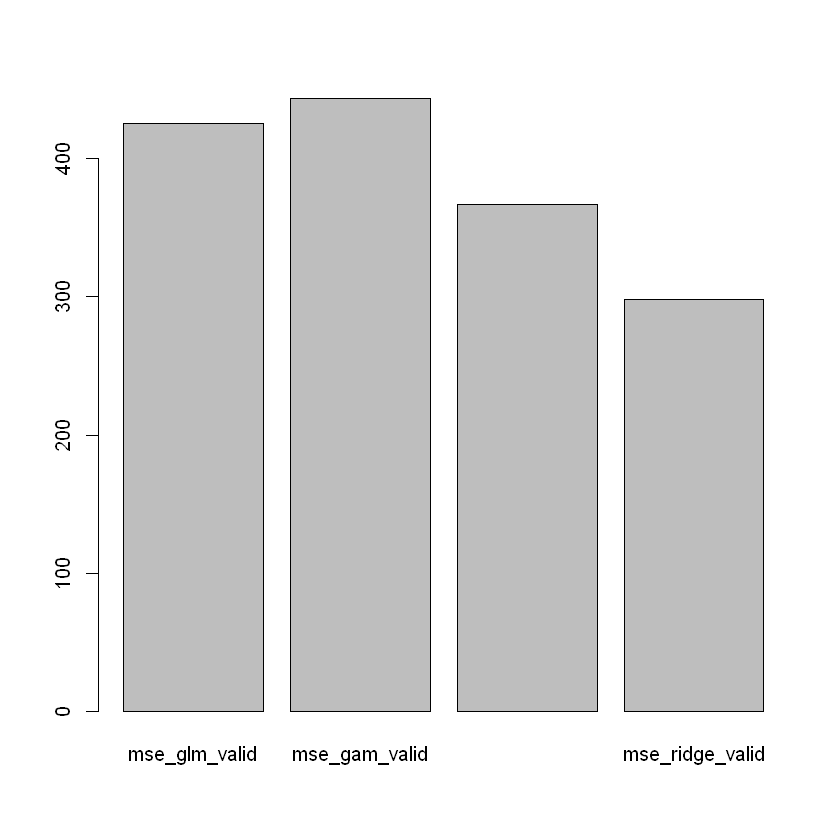

In [38]:
#Bar graph showing MSE errors for four models in the set validation.

x_train <- model.matrix(Salary ~ ., data = train)[,-1]
y_train <- train$Salary
x_valid <- model.matrix(Salary ~ ., data = valid)[,-1]
y_valid <- valid$Salary


mse_glm_valid <- caret::RMSE(predict(model_glm, newdata = valid), valid$Salary)
mse_gam_valid <- caret::RMSE(predict(gam_model, newdata = valid), valid$Salary)
mse_model_step_valid <- caret::RMSE(predict(model_step, newdata = valid), valid$Salary)
mse_ridge_valid <- RMSE(predict(ridge_model_optimal, newx = x_valid), y_valid)


mse_values <- c(mse_glm_valid, mse_gam_valid, mse_model_step_valid, mse_ridge_valid)

model_names <- c("mse_glm_valid", "mse_gam_valid", "mse_model_step_valid", "mse_ridge_valid")

barplot(mse_values, names.arg = model_names)        



Najnizsza wartosc RMSE ma model mse_ridge_valid, zmiennymi wykorzystanymi w modelu sa:  
(Salary ~ s(AtBat) + s(Hits) + s(HmRun) + s(Runs) + s(RBI) + s(Walks) + s(Years) + s(CAtBat) + s(CHits) + s(CHmRun) + s(CRuns) + s(CRBI) + s(CWalks) + s(PutOuts) + s(Assists) + s(Errors)
   
   


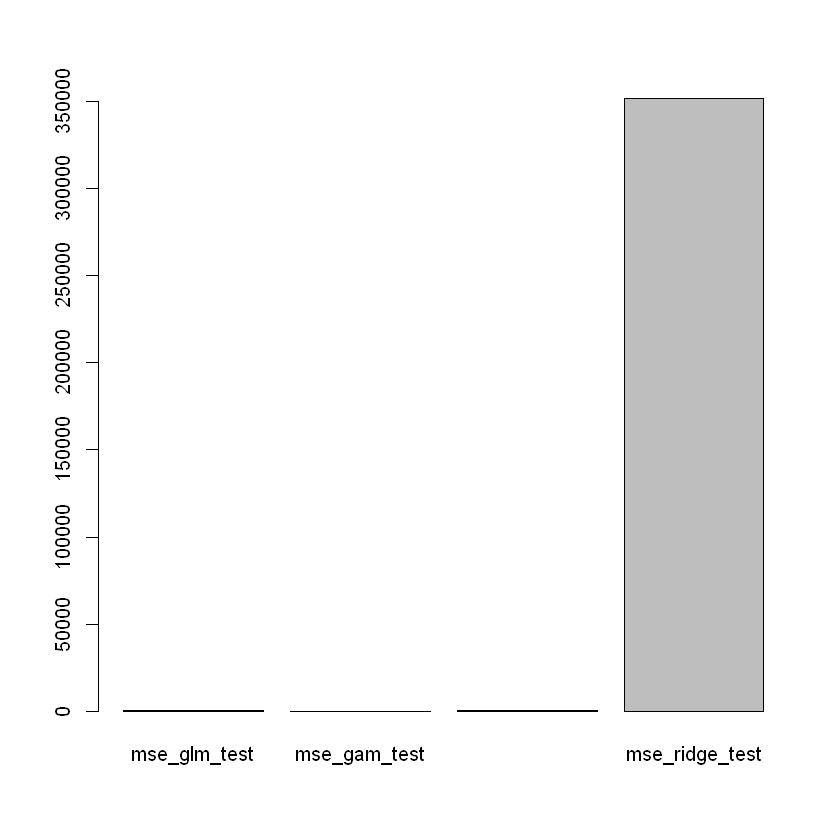

In [40]:
#Bar graph showing MSE errors for four models in the testing set.

x_test <- model.matrix(Salary ~ ., data = test)[, -c(14, 15, 19, 20)]
y_test <- test$Salary
   
mse_glm_test <- caret::RMSE(predict(model_glm, newdata = test), test$Salary)
mse_gam_test <- caret::RMSE(predict(gam_model, newdata = test), test$Salary)
mse_model_step_test <- caret::RMSE(predict(model_step, newdata = test), test$Salary)
mse_ridge_test <- caret::RMSE(predict(ridge_model_optimal, newx = x_test), test$Salary)
   
mse_values_test <- c(mse_glm_test, mse_gam_test, mse_model_step_test, mse_ridge_test)
   
model_names <- c("mse_glm_test", "mse_gam_test", "mse_model_step_test", "mse_ridge_test")
   
barplot(mse_values_test, names.arg = model_names)   


In [46]:
#Optimized salary I would pay the average player
average_player_data <- colMeans(Hitters[, -c(14, 15, 19, 20)])
average_player_df <- data.frame(t(average_player_data))
colnames(average_player_df) <- colnames(Hitters[, -c(14, 15, 19, 20)])
average_player_matrix <- as.matrix(average_player_df)  # Convert to matrix
predicted_average_player_salary <- predict(ridge_model_optimal, average_player_matrix)
show(predicted_average_player_salary)

           s0
[1,] 86054.98


In [47]:
#Optimized salary I would pay the best player
max_player_data <- apply(Hitters[, -c(14, 15, 19, 20)], 2, max)
max_player_df <- data.frame(t(max_player_data))
colnames(max_player_df) <- colnames(Hitters[, -c(14, 15, 19, 20)])
max_player_matrix <- as.matrix(max_player_df)  # Convert to matrix
predicted_max_player_salary <- predict(ridge_model_optimal, max_player_matrix)
show(predicted_max_player_salary)

           s0
[1,] 617846.3
